In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Dataset has negative values as seen through describe()
df = df[(df.Quantity > 0)]
df = df[(df.UnitPrice > 0)]

In [6]:
df['CustomerID'].nunique()

4338

In [7]:
# After removing negative values
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [9]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)
df.shape

(397884, 8)

In [10]:
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null object
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int32
Country        397884 non-null object
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [11]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


## EDA

In [13]:
## Finding number of orders made by customers

In [14]:
df.groupby(by=['CustomerID','Country'], as_index=False)['StockCode'].count().head()

,CustomerID,Country,StockCode
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


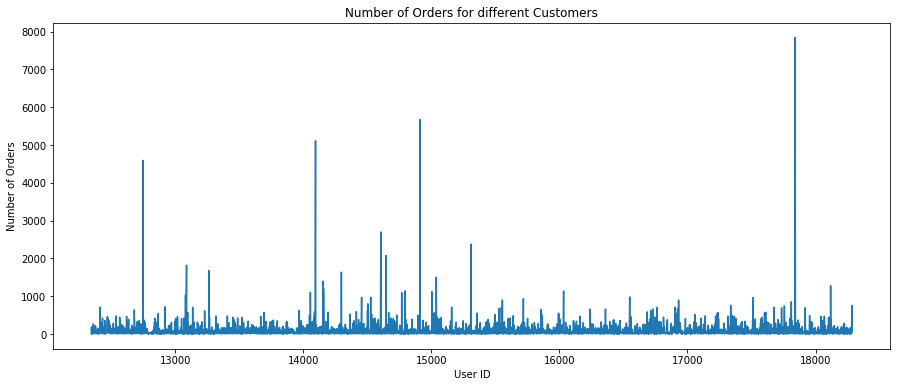

In [15]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['StockCode'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.StockCode)
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [16]:
## Top 5 most number of orders

In [17]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='StockCode', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,StockCode
4018,17841,United Kingdom,7847
1887,14911,EIRE,5675
1297,14096,United Kingdom,5111
334,12748,United Kingdom,4595
1669,14606,United Kingdom,2700


In [18]:
## Money spent by the customers

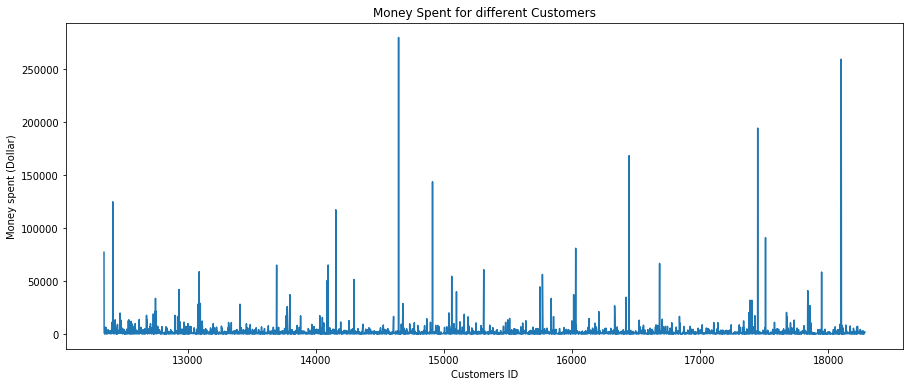

In [19]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [20]:
## Top 5 highest money spent
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='Amount', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,Amount
1697,14646,Netherlands,280206.02
4209,18102,United Kingdom,259657.30
3736,17450,United Kingdom,194550.79
3016,16446,United Kingdom,168472.50
1887,14911,EIRE,143825.06


In [21]:
## Discover Patterns for Each Country
## Number of orders from each country

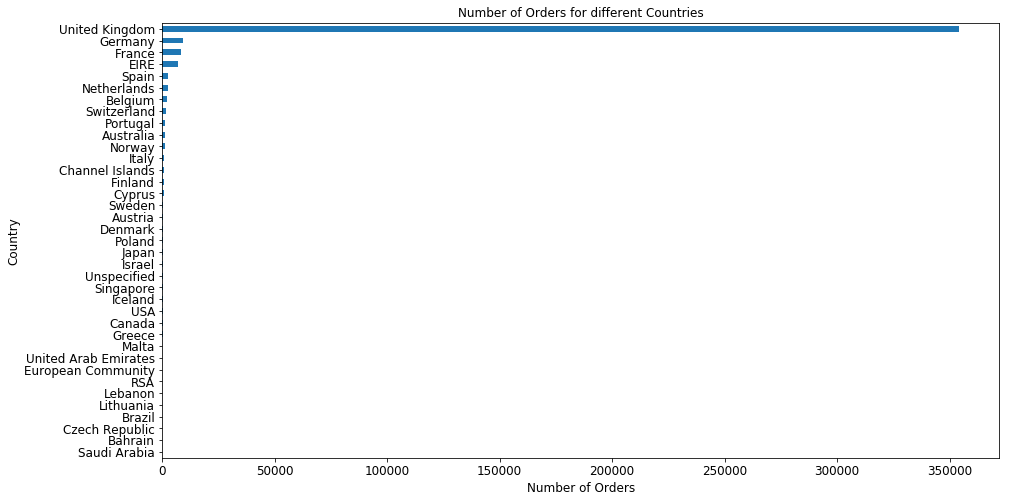

In [22]:
group_country_orders = df.groupby('Country')['StockCode'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

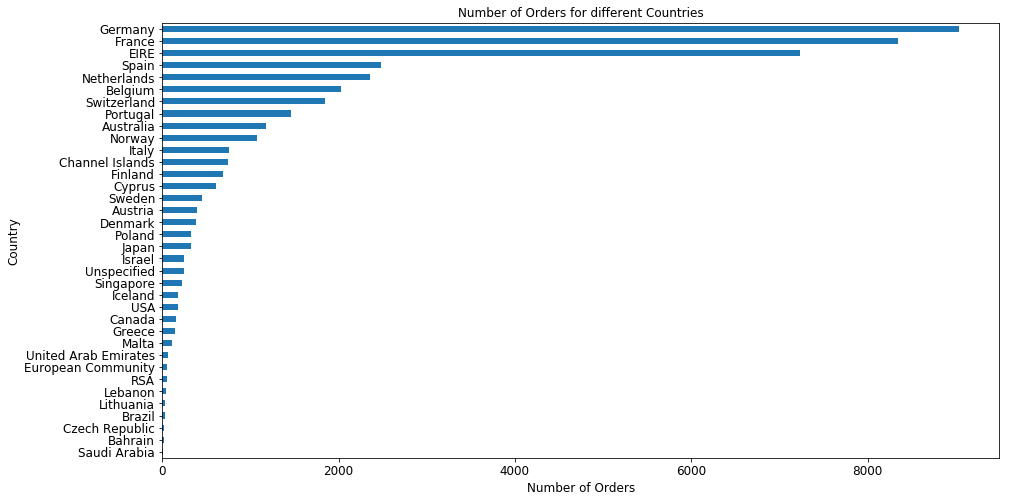

In [23]:
group_country_orders = df.groupby('Country')['StockCode'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [24]:
## Money spent by each country

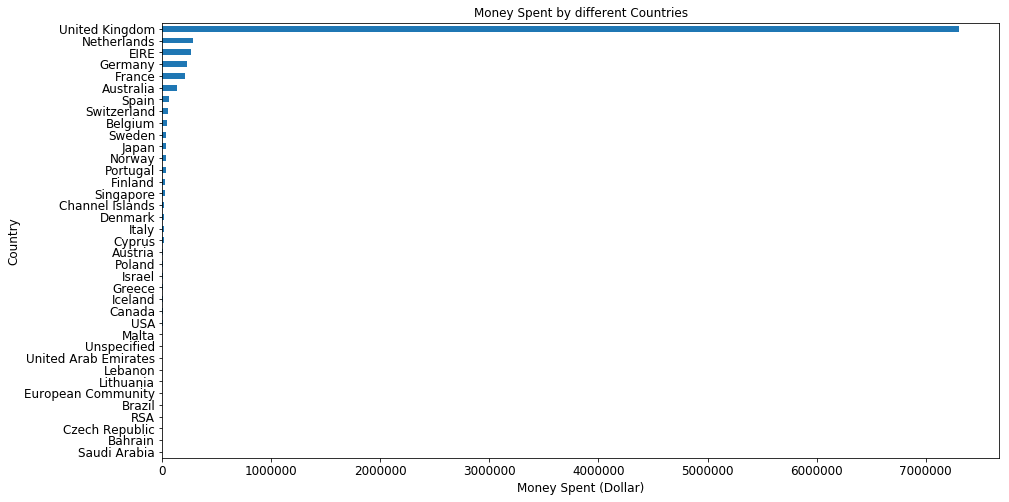

In [25]:
group_country_amount_spent = df.groupby('Country')['Amount'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

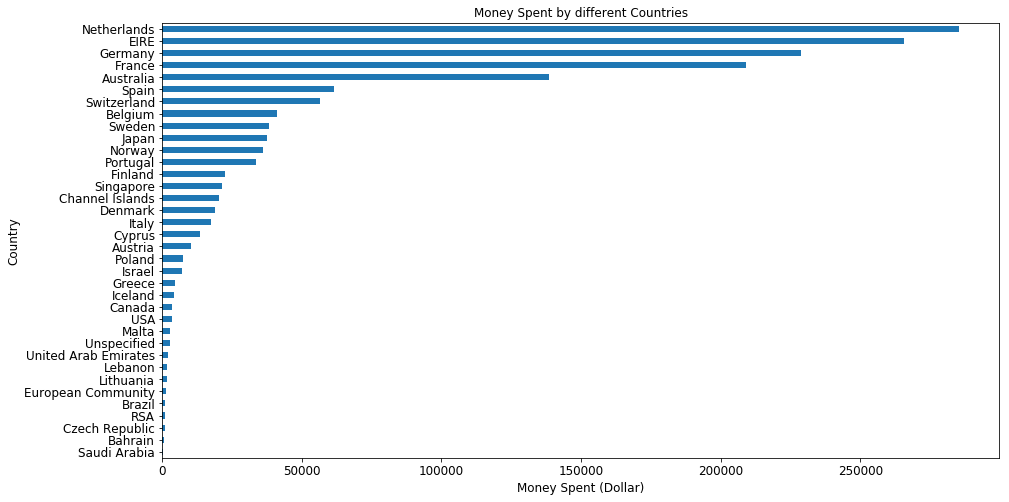

In [26]:
group_country_amount_spent = df.groupby('Country')['Amount'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## RFM Analysis

In [27]:
df['InvoiceDate'] = pd.DatetimeIndex(df['InvoiceDate']).date
df['InvoiceDate'].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDate, dtype: object

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [29]:
## Find the last txion date for each customer
df['LastTxionDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
df['FirstTxionDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df[df['CustomerID'] == 17850 ].sort_values('InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,LastTxionDate,FirstTxionDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010-12-02,2010-12-01
293,536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom,15.30,2010-12-02,2010-12-01
292,536396,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-02,2010-12-01
291,536396,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-02,2010-12-01
290,536396,82494L,WOODEN FRAME ANTIQUE WHITE,12,2010-12-01,2.55,17850,United Kingdom,30.60,2010-12-02,2010-12-01
289,536396,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01,2.10,17850,United Kingdom,12.60,2010-12-02,2010-12-01
288,536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01,6.95,17850,United Kingdom,27.80,2010-12-02,2010-12-01
287,536396,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2,2010-12-01,4.95,17850,United Kingdom,9.90,2010-12-02,2010-12-01
286,536396,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6,2010-12-01,1.06,17850,United Kingdom,6.36,2010-12-02,2010-12-01
285,536396,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01,1.06,17850,United Kingdom,6.36,2010-12-02,2010-12-01


In [30]:
# Max date for the dataset will be last day of Feb 19 as the dataset contains entries from Feb 18 to Feb 19

snapshot_dt = dt.date(2019,2,28)
snapshot_dt

datetime.date(2019, 2, 28)

In [31]:
rfm_df = df.groupby('CustomerID').agg(
    {
        'InvoiceDate':lambda x:(snapshot_dt - x.max()).days,
        'InvoiceNo':'count',
        'Amount':'sum',
        #'InvoiceDate':lambda x:(snapshot_dt - x.min()).days,
    }
)
rfm_df.head()

,InvoiceDate,InvoiceNo,Amount
CustomerID,,,
12346,2963,1,77183.60
12347,2640,182,4310.00
12348,2713,31,1797.24
12349,2656,73,1757.55
12350,2948,17,334.40


In [32]:
rfm_df.rename(columns=
                {
                    'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'Amount':'Monetary'
                },inplace=True
               )
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2963,1,77183.60
12347,2640,182,4310.00
12348,2713,31,1797.24
12349,2656,73,1757.55
12350,2948,17,334.40


In [33]:
rfm_df = rfm_df[(rfm_df['Recency']>0)]

In [34]:
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2963,1,77183.60
12347,2640,182,4310.00
12348,2713,31,1797.24
12349,2656,73,1757.55
12350,2948,17,334.40


## Customer Segments with RFM Model

In [35]:
# RFM Quartiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,2655.00,17.0,307.415
0.50,2688.00,41.0,674.485
0.75,2779.75,100.0,1661.740


In [36]:
quantiles.to_dict()

{'Recency': {0.25: 2655.0, 0.5: 2688.0, 0.75: 2779.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000007}}

In [37]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [38]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [39]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346,2963,1,77183.60,1,1,4
12347,2640,182,4310.00,4,4,4
12348,2713,31,1797.24,2,2,4
12349,2656,73,1757.55,3,3,4
12350,2948,17,334.40,1,1,2


In [40]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,2963,1,77183.60,1,1,4,114
12347,2640,182,4310.00,4,4,4,444
12348,2713,31,1797.24,2,2,4,224
12349,2656,73,1757.55,3,3,4,334
12350,2948,17,334.40,1,1,2,112


In [41]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,2963,1,77183.60,1,1,4,114
12347,2640,182,4310.00,4,4,4,444
12348,2713,31,1797.24,2,2,4,224
12349,2656,73,1757.55,3,3,4,334
12350,2948,17,334.40,1,1,2,112


In [42]:
rfm_segmentation[rfm_segmentation['RFMScore']=='111'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
13932,2932,16,307.40,1,1,1,111
17334,2940,11,307.02,1,1,1,111
15087,2919,15,306.94,1,1,1,111
13762,2856,7,306.72,1,1,1,111
13718,2884,12,306.55,1,1,1,111
17176,2839,15,306.13,1,1,1,111
15219,2814,9,305.75,1,1,1,111
18220,2864,2,305.28,1,1,1,111
18185,2887,17,304.25,1,1,1,111


In [43]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  440
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  103
Lost Customers:  21
Lost Cheap Customers:  385


In [44]:
# Now we can deal with customer segment differently.
#We can reward the best customers and send personalized emails to the customers at risk